# plot the migration matrices for all kinematical variables

In [1]:
from Xsec_setup import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/Xsec/Figures/migration_matrices/'
migration_maps_path = '/Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/migration_maps/'

In [3]:
versions['overlay date'] = '2018_08_16'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
OverlaySamples = load_samples(date=versions['overlay date']
                              ,filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')

285009 ccqe candidate pairs, 187262 in FV
74387 are 1mu-1p, 39.7%
55226 are other pairs, 29.5%
155396 are cosmic, 83.0%
--------------------------------------------------------------
36843 are CC 1p 0pi, 19.7%
--------------------------------------------------------------
40729 are CC 1p, 21.7%
I finished loading overlay samples. We have in total 285009 pairs


In [4]:
cuts_order  = ['no cut','Chi2Proton','Nflashes','MatchedFlash','length'
               ,'non-collinearity','vertex activity'
               ,'delta phi','Pt & delta phi']
cutlabels = ['preselection','$dE/dx$ profile',r'$N_{flashes}>0$','optical filter','track lengths'
             ,'non-collinearity','vertex activity'
             ,'coplanarity','$p_t<0.35$ GeV/c']

In [5]:
reducedOverlay,pureffOverlay,_ = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,CC$1 p$ eff.,CC$1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi,CC 1p
no cut,100.0%,26.1%,100.0%,12.9%,100.0%,14.3%,no cut,100.0% (74387),100.0% (55226),100.0% (155396),100.0% (36843),100.0% (40729)
Chi2Proton,62.0%,73.0%,67.1%,39.2%,66.3%,42.7%,Chi2Proton,62.0% (46155),17.3% (9547),4.8% (7485),67.1% (24739),66.3% (26989)
Nflashes,61.7%,75.2%,66.8%,40.3%,65.9%,44.0%,Nflashes,61.7% (45931),17.2% (9495),3.6% (5664),66.8% (24612),65.9% (26859)
MatchedFlash,47.5%,81.1%,51.5%,43.6%,51.2%,47.8%,MatchedFlash,47.5% (35339),11.2% (6184),1.3% (2050),51.5% (18991),51.2% (20836)
length,43.1%,85.4%,47.3%,46.5%,46.6%,50.6%,length,43.1% (32061),6.8% (3754),1.1% (1707),47.3% (17430),46.6% (18980)
non-collinearity,39.7%,89.2%,45.1%,50.3%,44.2%,54.4%,non-collinearity,39.7% (29505),5.0% (2760),0.5% (795),45.1% (16627),44.2% (17993)
vertex activity,29.2%,90.6%,40.5%,62.3%,38.5%,65.5%,vertex activity,29.2% (21717),3.3% (1802),0.3% (443),40.5% (14922),38.5% (15689)
delta phi,20.2%,96.0%,31.9%,75.2%,29.9%,77.8%,delta phi,20.2% (15005),0.8% (451),0.1% (179),31.9% (11756),29.9% (12159)
Pt & delta phi,17.6%,96.8%,28.5%,77.6%,26.7%,80.3%,Pt & delta phi,17.6% (13113),0.6% (319),0.1% (119),28.5% (10514),26.7% (10877)


# $CC 1p$ migration matrices before all cuts

In [6]:
sam = reducedOverlay['no cut']['CC 1p']

In [7]:
def create_migration_map(bins=linspace(0.1,1.3,6)
                         ,xvar='truth_Pmu'
                         ,yvar='reco_Pmu_mcs'
                         ,mul=1):
    print str(["{0:0.2f}".format(i) for i in bins]).replace("'", "")
    fig,ax=plt.subplots(figsize=(4.85,3))
    ax.hist(mul*sam[xvar],color='tomato',bins=bins)
    set_axes(ax,'true (generated)')
    xbins = ybins = bins*(1./mul)
    nbins = len(bins)-1
    h = np.zeros((nbins,nbins))
    for ix in range(nbins):
        xmin,xmax = xbins[ix],xbins[ix+1]  
        sum_in_column = 0
        for iy in range(nbins):
            ymin,ymax = ybins[iy],ybins[iy+1]
            sam_bin = sam[(sam[xvar]>xmin)&(sam[xvar]<xmax)&(sam[yvar]>ymin)&(sam[yvar]<ymax)]
            h[ix][iy] = float(len(sam_bin))
            sum_in_column += h[ix][iy]        
        # now normalize the entire column to 1
        for iy in range(nbins):
            h[ix][iy] /= sum_in_column
    h=h.T
    print 'done'

    fig,ax = plt.subplots(figsize=(9.708,6))
    sns.set(font_scale=2);
    sns.heatmap(h,annot=True,fmt=".2f",cbar=False,cmap='jet')
    set_axes(ax,'True bin $j$','Reconstructed bin $i$')
    ax.invert_yaxis()
    plt.tight_layout()
    filename = migration_maps_path + "%s_vs_%s_%d_bins.csv"%(xvar,yvar,nbins)
    np.savetxt(filename, h, delimiter=",")
    print 'saved',filename

[0.10, 0.33, 0.57, 0.80, 1.03, 1.27, 1.50]
done
saved /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/migration_maps/truth_Pmu_vs_reco_Pmu_mcs_6_bins.csv
[0.20, 0.37, 0.53, 0.70, 0.87, 1.03, 1.20]
done
saved /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/migration_maps/truth_Pp_vs_reco_Pp_6_bins.csv
[0.00, 20.00, 40.00, 60.00, 80.00, 100.00, 120.00]
done
saved /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/migration_maps/truth_Pmu_theta_vs_reco_Pmu_mcs_theta_6_bins.csv
[0.00, 15.00, 30.00, 45.00, 60.00, 75.00, 90.00]
done
saved /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/migration_maps/truth_Pp_theta_vs_reco_Pp_theta_6_bins.csv


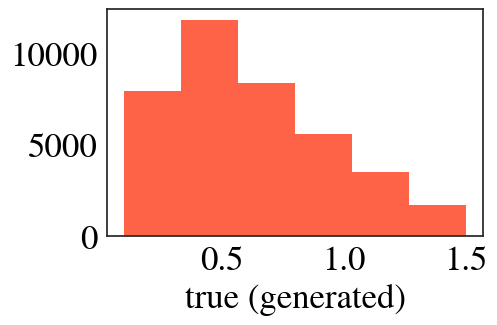

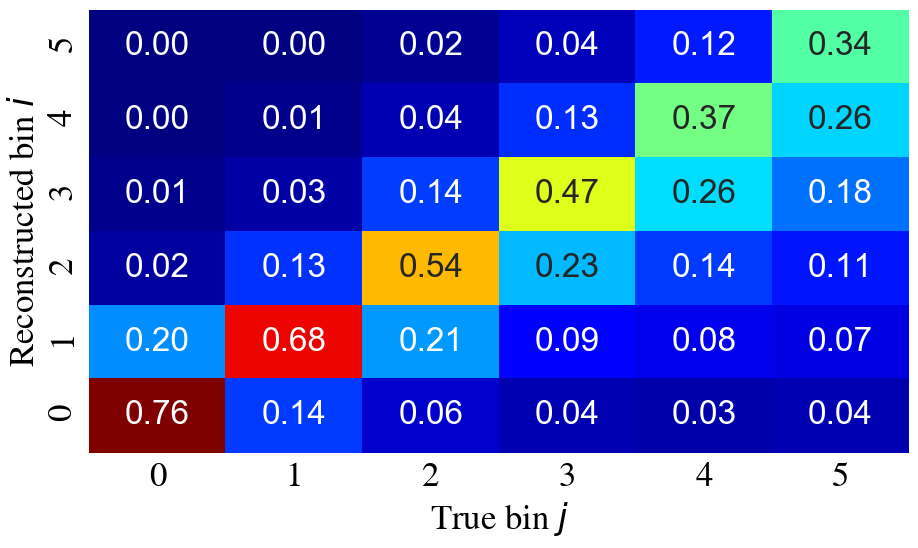

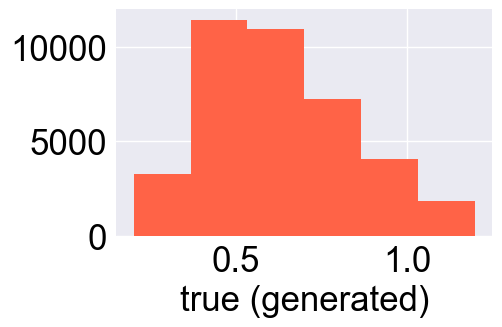

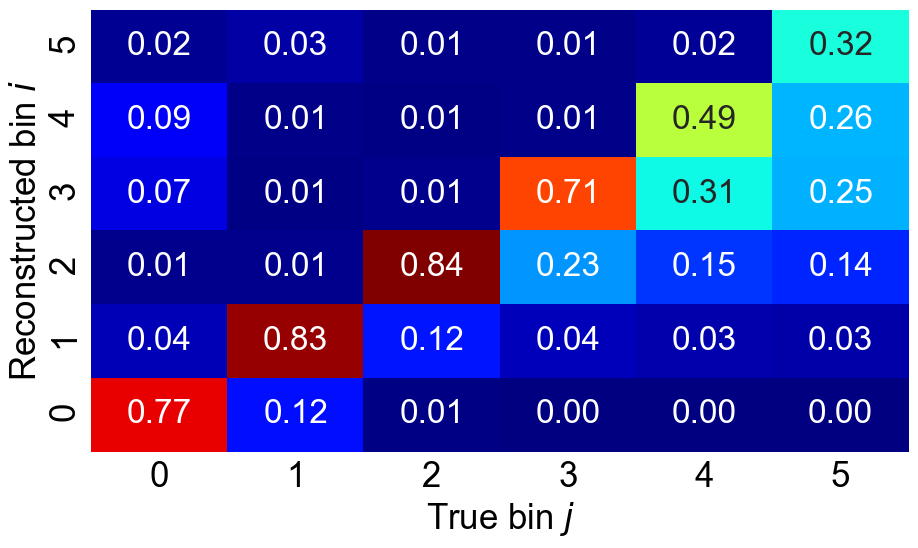

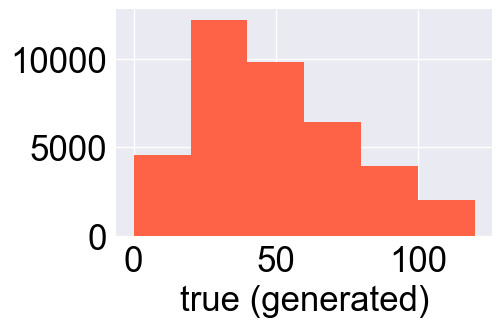

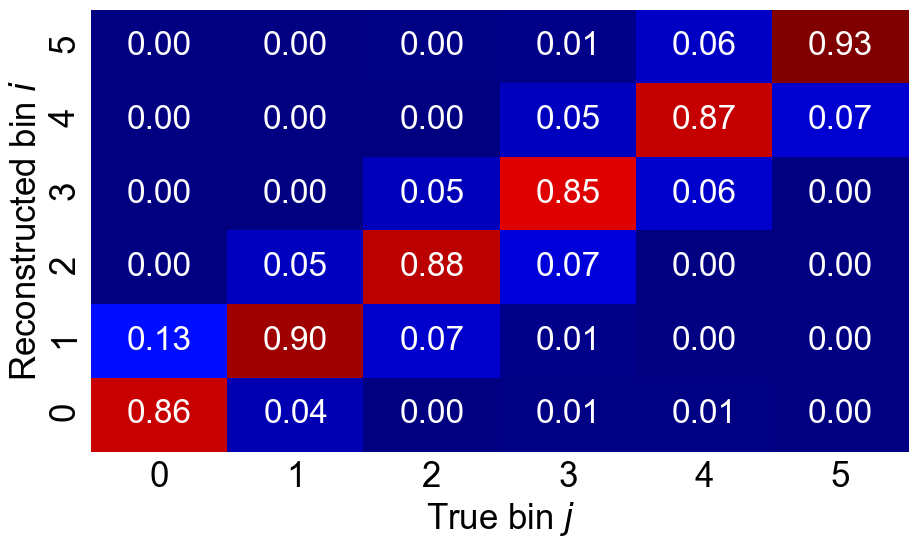

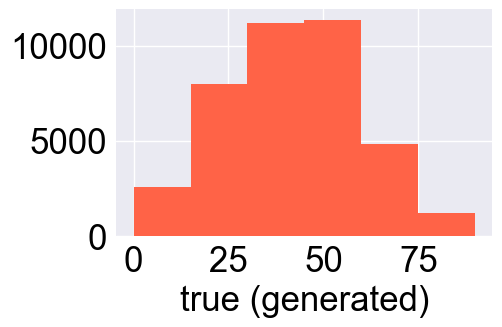

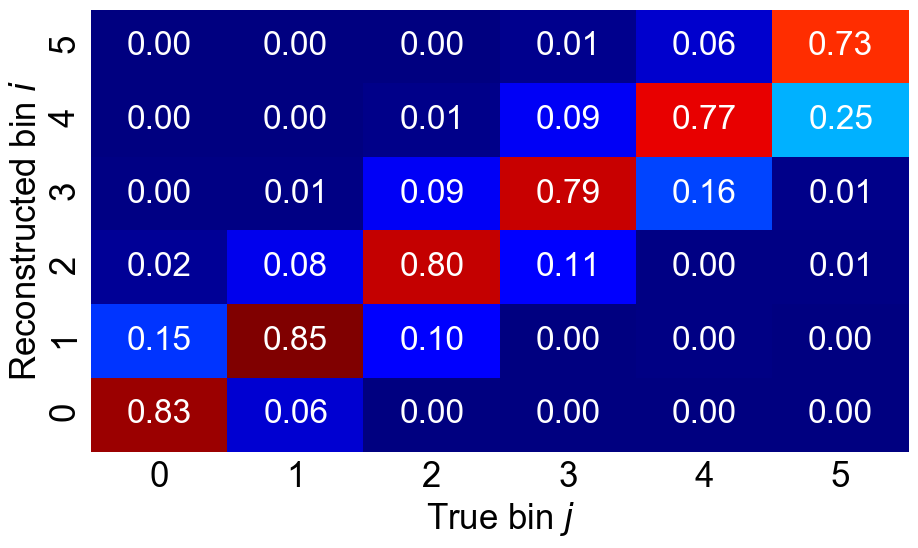

In [8]:
create_migration_map(bins=Bins['Pmu']
                         ,xvar='truth_Pmu'
                         ,yvar='reco_Pmu_mcs')

create_migration_map(bins=Bins['Pp']
                         ,xvar='truth_Pp'
                         ,yvar='reco_Pp')

create_migration_map(bins=Bins['theta(mu)']
                     ,xvar='truth_Pmu_theta'                     
                     ,yvar='reco_Pmu_mcs_theta'
                     ,mul=180./np.pi)

create_migration_map(bins=Bins['theta(p)']
                     ,xvar='truth_Pp_theta'                         
                     ,yvar='reco_Pp_theta'
                     ,mul=180./np.pi)